In [3]:
import torch
import torch.nn as nn

a = torch.tensor([[1,2],[3,4]])
print(a.shape)
print(a.size())
b = torch.reshape(a,(-1,))
print(b, b.shape)

torch.Size([2, 2])
torch.Size([2, 2])
tensor([1, 2, 3, 4]) torch.Size([4])


# PyTorch `torch.reshape` 的工作原理

## 基本语法

```python
torch.reshape(input, shape)
```

- `input`: 要重塑的张量
- `shape`: 目标形状 (元组或列表)

## 关键参数：`-1` 的含义

`-1` 表示**自动推断该维度的大小**，以保持张量总元素数不变。

## 你的代码示例详解

```python
import torch

a = torch.tensor([[1,2],[3,4]])
print(a.shape)  # 输出: torch.Size([2, 2])
print(a.size()) # 输出: torch.Size([2, 2])  # size() 是 shape 的别名

b = torch.reshape(a, (-1,))
print(b, b.shape)  # 输出: tensor([1, 2, 3, 4]) torch.Size([4])
```

### 过程分析

1. **原始张量 `a`**:
   - 形状: `(2, 2)`
   - 元素总数: `2 × 2 = 4`
   - 布局: `[[1, 2], [3, 4]]`

2. **重塑操作**:
   - 目标形状: `(-1,)` → 一维张量
   - `-1` 被推断为 `4` (因为总元素数必须保持为4)
   - 结果形状: `(4,)`

3. **内存布局**:
   - `torch.reshape` 通常是**零拷贝**操作 (如果可能)
   - 元素按行优先顺序 (C-style) 展开: `[1, 2, 3, 4]`

## 更多示例

```python
# 原始张量: (2, 3)
c = torch.arange(6).reshape(2, 3)  # tensor([[0,1,2],[3,4,5]])

# 重塑为 (3, 2)
d = torch.reshape(c, (3, 2))  # tensor([[0,1],[2,3],[4,5]])

# 使用 -1 自动推断
e = torch.reshape(c, (-1, 2))  # 等价于 (3, 2)
f = torch.reshape(c, (2, -1))  # 等价于 (2, 3)
```

## 注意事项

- **总元素数必须匹配**: 重塑前后元素总数必须相同
- **内存连续性**: 如果张量不连续，`reshape` 可能需要拷贝
- **替代方法**: `view()` 更严格 (要求连续内存)，`reshape()` 更灵活

在这个例子中，`(-1,)` 简单地将二维张量展平为一维向量。

In [1]:
import numpy as np

x = torch.tensor(np.arange(5))
y = torch.tensor(np.arange(5).reshape(-1, 1))
z1 = x * y
z2 = x + y
z3 = x + z1

print(x, x.shape)
print(y, y.shape)
print(z1, z1.shape)
print(z2, z2.shape)
print(z3, z3.shape)

NameError: name 'torch' is not defined

这里的代码来自spinningup exercise2.2,主要是展示了(batchsize,)和(batchsize,1)的区别。在exercise2.2中，DDPG的q函数计算输出size为(batchsize,1)，这个会对训练造成灾难性的后果，广播机制会在后面把q函数完全当成一个向量计算，但实际上是一个数。具体可以见下面的spinningup文档
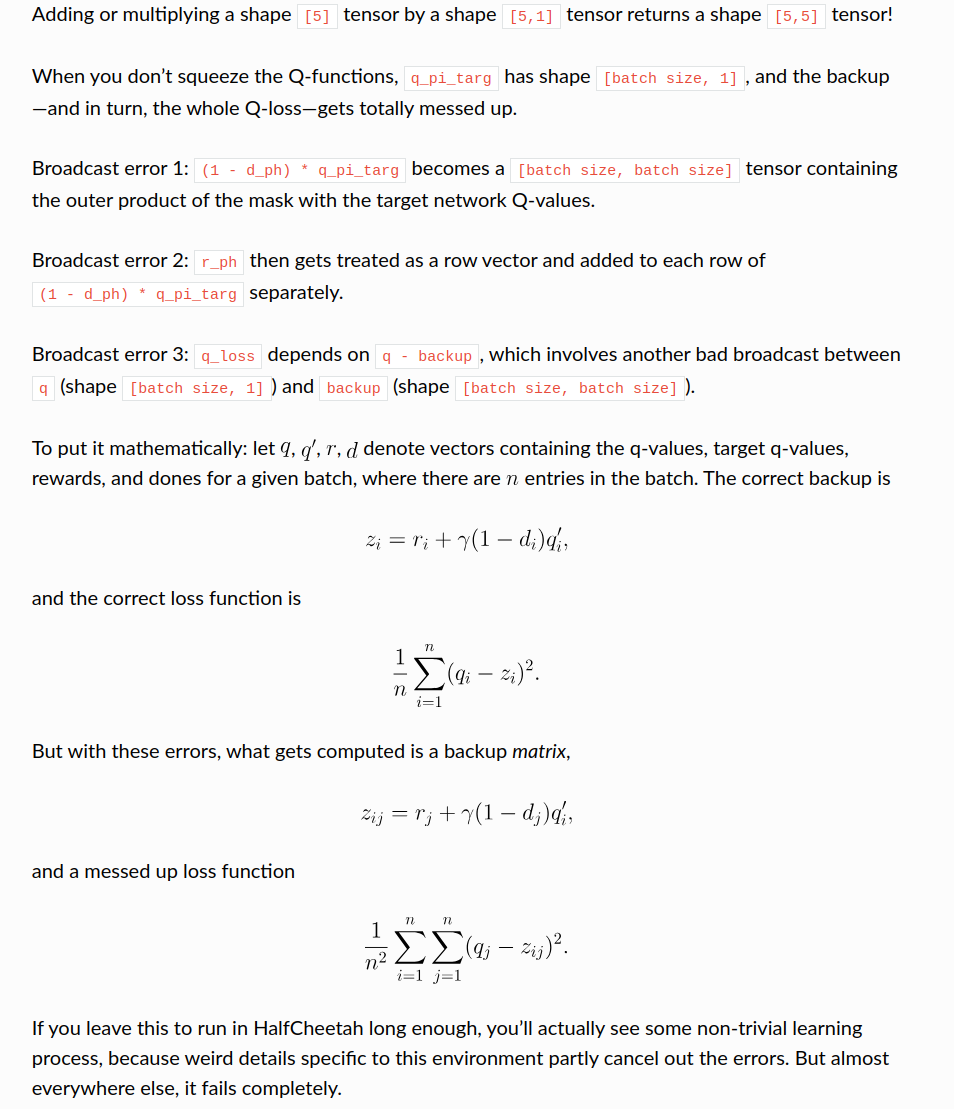

In [5]:
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED) 
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)
random_tensor_E = torch.rand(3, 4)
print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Tensor E:\n{random_tensor_E}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor D:
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])

Tensor E:
tensor([[0.8694, 0.5677, 0.7411, 0.4294],
        [0.8854, 0.5739, 0.2666, 0.6274],
        [0.2696, 0.4414, 0.2969, 0.8317]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [4]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

# Create tensor (default on CPU)
tensor = torch.tensor([1, 2, 3])

# Tensor not on GPU
print(tensor, tensor.device)

# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

True
1
cuda
tensor([1, 2, 3]) cpu


tensor([1, 2, 3], device='cuda:0')